# Pyplot Tutorial

## Introduction

pyplot是一个命令行风格的函数集合，使matplotlib工作起来就像MATLAB一样便捷。

pypolt中每个函数都提供了一种“改变图像”的方法，例如：
- 创建一幅图(figure) 
- 在图中创建绘图区(plotting area)
- 在绘图区中画线(line)
- 添加额外绘图说明等(labels, etc)

pypolt中的方法操作的对象是当前图像，pyplot的API比起**面向对象的API**灵活性更差一些。

## Contents

- The Pyplot API
- The Object-Oriented API
- Colors in Matplotlib

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## plt.show() function

默认情况下，matplotlib.pyplot 不会直接显示图像，只有调用 plt.show() 函数时，图像才会显示出来。

plt.show() 默认是在新窗口打开一幅图像，并且提供了对图像进行操作的按钮。

## plt.plot() function

plt.plot()用来绘图，基本用法有：
- plot(x, y)        # plot x and y using default line style and color-
- plot(x, y, 'bo')  # plot x and y using blue circle markers
- plot(y)           # plot y using x as index array 0..N-1
- plot(y, 'r+')     # ditto, but with red plusses

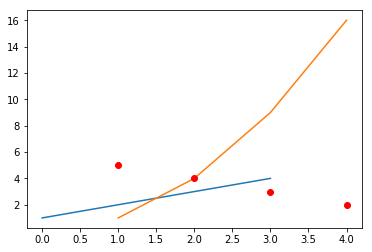

In [2]:
plt.plot([1, 2, 3, 4])
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.plot([1, 2, 3, 4], [5, 4, 3, 2], 'ro')
plt.show()

## plt.axis() function

同Matlab一样，绘图可以指定显示范围，[xmin, xmax, ymin, ymax]

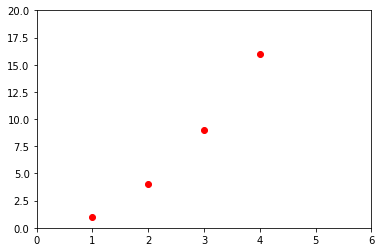

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

## Formatting string of the plot

可以在plot中传入字符串参数来控制格式：

字符	|类型	|字符	|类型
---|---|---|---
'-'	|实线	     |'--'	|虚线
'-.'|虚点线	 |':'	|点线
'.'	|点	      |','	 |像素点
'o'	|圆点      |'v'	|下三角点
'^'	|上三角点	|'<'	|左三角点
'>'	|右三角点	|'1'	|下三叉点
'2'	|上三叉点	|'3'	|左三叉点
'4'	|右三叉点	|'s'	|正方点
'p'	|五角星     |'*'	 |星形点
'h'	|六边形点1	|'H'	|六边形点2
'+'	|加号点	 |'x'    |乘号点
'D'	|实心菱形点 |'d'    |瘦菱形点
'_'	|横线点||	

字符|颜色|字符|颜色|字符|颜色|字符|颜色
---|---|---|---|---|---|---|---
g|绿色；green|r|红色；red|m|品红色；magenta|y|黄色；yellow
k|黑色；black|w|白色；white|b|蓝；blue|c|青色；cyan

同时，字符串可读性不高，还支持关键字格式：

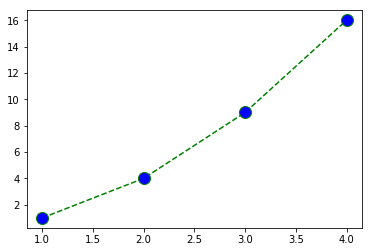

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], color='green', linestyle='dashed',
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()

## Using numpy array

比起传入列表参数，使用数组更加方便。事实上，matplotlib内部会将list转为数组。

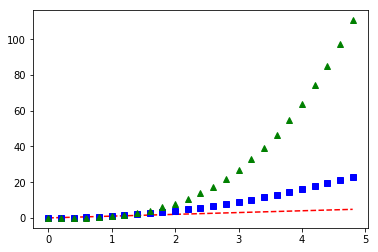

In [5]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

## Controlling line properties

- 使用键值对参数

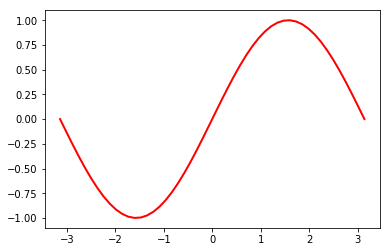

In [6]:
x = np.linspace(-np.pi,np.pi)
y = np.sin(x)

plt.plot(x, y, linewidth=2.0, color='r')

plt.show()

- 使用plot返回值对象属性设置
    - plot返回一个Line2D对象组成的列表，`line1, line2 = plt.plot(x1, y1, x2, y2)`
    - 使用`，`获得第一个对象，`line = plt.plot(x, y, 'r')`

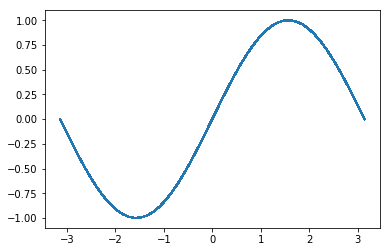

In [7]:
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialising
plt.show()

- 利用plt.setp()方法

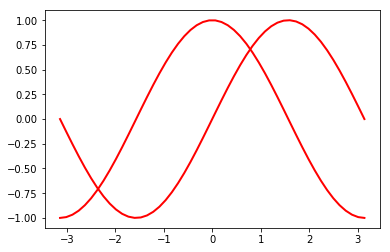

In [8]:
x1 = x2 = np.linspace(-np.pi,np.pi)
y1 = np.sin(x1)
y2 = np.cos(x2)

lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

plt.show()

查看setp支持的属性

In [9]:
plt.setp(lines)

  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: [True | False] 
  antialiased or aa: [True | False] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a :class:`matplotlib.figure.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``

## Multiple figures and axes

所有的plot命令都是针对当前对象的：
- 得到当前axes： plt.gca(projection='polar')
- 得到当前figure： pyplot.gcf()

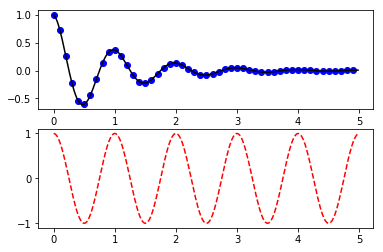

In [10]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

- figure(1)可以产生一副指定数字为1的图,使用figure()默认创建一张新图
- subplot(numrols, numcols, numfigure,fignum where fignum ranges from 1 to numrows \* numcol，当数字小于10，逗号可以省略。

```
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
```

## Text

使用text()可以在任意位置添加字符。包括标签，标题，注释等。

例如用hist()画一个直方图。

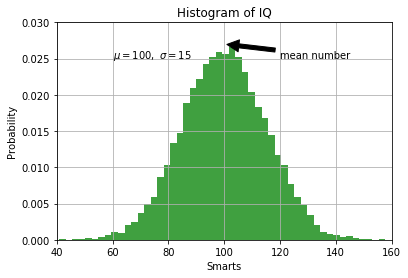

In [11]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.annotate('mean number', xy=(100, 0.027), xytext=(120, 0.025),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()